# Traffic Citations Data Analysis

This notebook performs exploratory data analysis on the Memphis Police Department Traffic Citations dataset to assess its suitability for training a machine learning classifier.

**Key Analysis Areas:**
- Driver demographics (Race, Gender, Age)
- Vehicle characteristics (Year, Make, Model)
- Citation details (Citation Type, Ordinance Violated)
- Data balance and representation

## Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
data_path = 'data/MPD_Traffic_Citations_7556764744132158405.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Total records: {len(df):,}")
print(f"\nDataset shape: {df.shape}")

Dataset loaded successfully!
Total records: 674,379

Dataset shape: (674379, 15)


## Initial Data Overview

In [3]:
# Display first few rows
print("Sample Records:")
df.head(10)

Sample Records:


,Ticket Number,Ticket Issue Date,Citation Type,Ordinance Violated,Vehicle Year,Vehicle Make,Vehicle Model,Driver Race,Driver Gender,Driver Age,Officer IBM,Officer Name,Location,Driver License ZIP Code,ObjectId
0,E024596,9/28/2018 6:17:00 AM,NON-MOVING,NO DRIVERS LICENSE,2011.0,CHEVR,CRUZE,Black,Male,23,11471,D GRAY,LAMAR AV SOUTHWALL,38128,1
1,E024599,10/27/2018 1:00:00 PM,MOVING,SPEED LIMIT,2003.0,TOYOT,SEQ,Black,Female,59,11471,D GRAY,THIRD GAGE,38106,2
2,E029132,9/20/2018 5:16:00 AM,MOVING,SPEED LIMIT,2000.0,NISSA,MAXIM,Black,Female,24,12110,D. DERMYER,I-240 SOUTH LAMAR,38109,3
3,E029134,9/20/2018 5:47:00 AM,MOVING,SPEED LIMIT,2013.0,NISSA,MURAN,Black,Female,50,12110,D. DERMYER,NaN,38134,4
4,E029135,9/20/2018 6:00:00 AM,MOVING,SPEED LIMIT,2013.0,NISSA,VMT,White,Female,53,12110,D. DERMYER,NaN,38326,5
5,E029144,10/16/2018 5:09:00 AM,MOVING,SPEED LIMIT,2015.0,CHEVR,TAHOE,White,Male,35,12110,D. DERMYER,NaN,38068,6
6,E029145,10/16/2018 7:13:00 AM,MOVING,SPEED LIMIT,2013.0,DODGE,CHARG,Black,Male,39,12110,D. DERMYER,INTERSTATE-240 GETWELL RD,38016,7
7,E032591,6/17/2019 3:05:00 PM,MOVING,SPEED LIMIT,2015.0,BUICK,ENR,White,Male,36,12596,"PIRTLE, B",SAM COOPER BLVD GRAHAM ST,46321,8
8,E032698,11/9/2018 11:51:00 PM,MOVING,SPEED LIMIT,2013.0,FORD,TAURU,Black,Female,27,12548,BATTS,I240 MADISON,38128,9
9,E033312,1/19/2019 2:22:00 AM,MOVING,SPEED LIMIT,2018.0,NISSA,ALTIM,Black,Female,21,12348,"TINSON, A",KIRBY PW SUMMER CREEK,38116,10


In [4]:
# Data types and missing values
print("Dataset Information:")
print("=" * 80)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674379 entries, 0 to 674378
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Ticket Number            674379 non-null  object 
 1   Ticket Issue Date        674314 non-null  object 
 2   Citation Type            671993 non-null  object 
 3   Ordinance Violated       671993 non-null  object 
 4   Vehicle Year             655272 non-null  float64
 5   Vehicle Make             674376 non-null  object 
 6   Vehicle Model            674371 non-null  object 
 7   Driver Race              674379 non-null  object 
 8   Driver Gender            674379 non-null  object 
 9   Driver Age               674379 non-null  int64  
 10  Officer IBM              674379 non-null  object 
 11  Officer Name             674379 non-null  object 
 12  Location                 668502 non-null  object 
 13  Driver License ZIP Code  666563 non-nu

Missing Values Summary:
                         Missing Count  Percentage
Vehicle Year                     19107    2.833273
Driver License ZIP Code           7816    1.158992
Location                          5877    0.871468
Ordinance Violated                2386    0.353807
Citation Type                     2386    0.353807
Ticket Issue Date                   65    0.009638
Vehicle Model                        8    0.001186
Vehicle Make                         3    0.000445


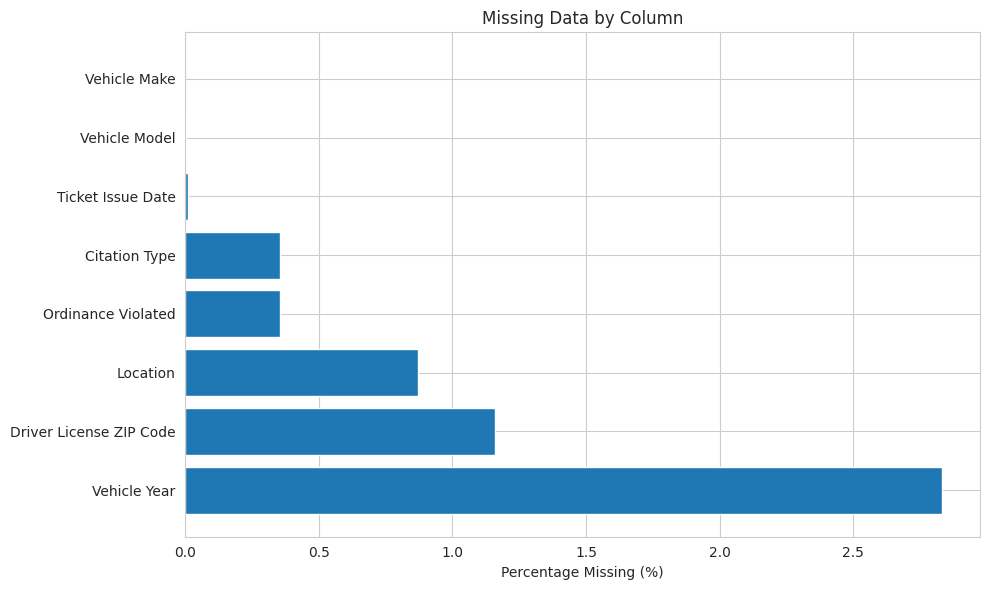

In [5]:
# Missing values analysis
print("Missing Values Summary:")
print("=" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing data
if missing_df['Missing Count'].sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_data = missing_df[missing_df['Missing Count'] > 0]
    plt.barh(missing_data.index, missing_data['Percentage'])
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Data by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found!")

## 1. Driver Demographics Analysis

### 1.1 Driver Race Distribution

Driver Race Distribution:
                                   Count  Percentage
Driver Race                                         
Black                             505920   75.020130
White                              95428   14.150500
Hispanic                           63514    9.418146
Asian                               6634    0.983720
Other                               1394    0.206709
American Indian/Alaskan Native      1089    0.161482
Native Hawaiian/Pacific Islander     400    0.059314


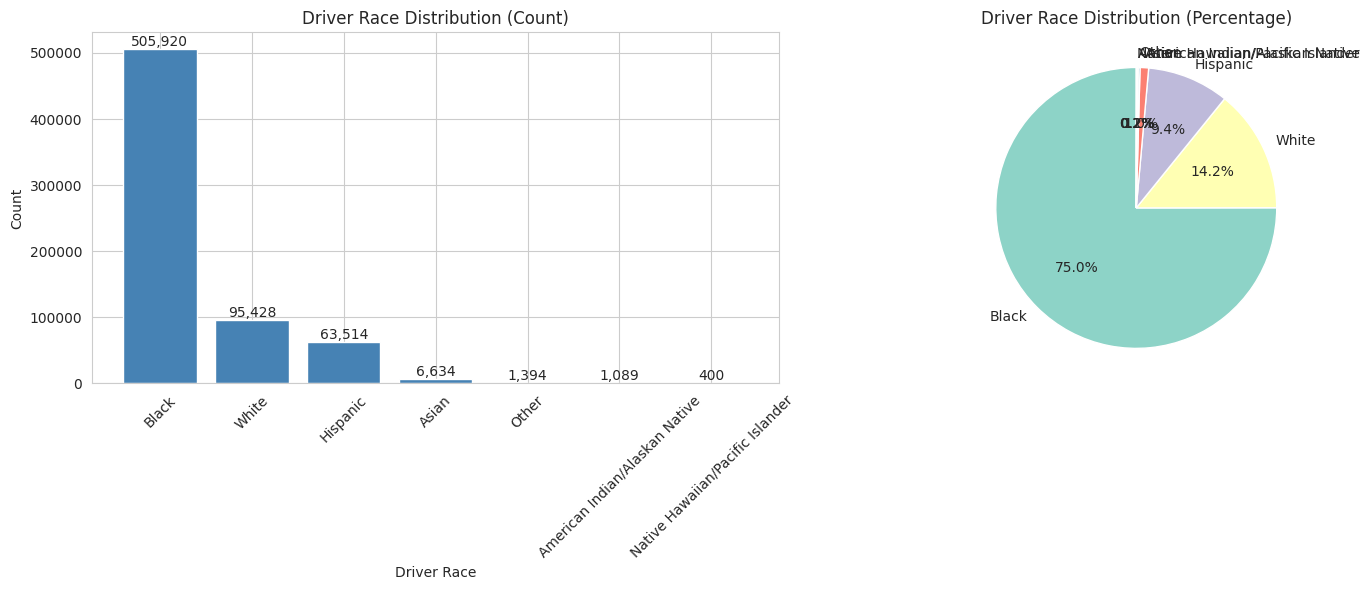


Unique races: 7


In [6]:
# Driver Race analysis
print("Driver Race Distribution:")
print("=" * 80)
race_counts = df['Driver Race'].value_counts()
race_pct = df['Driver Race'].value_counts(normalize=True) * 100

race_summary = pd.DataFrame({
    'Count': race_counts,
    'Percentage': race_pct
})
print(race_summary)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
axes[0].bar(race_counts.index, race_counts.values, color='steelblue')
axes[0].set_xlabel('Driver Race')
axes[0].set_ylabel('Count')
axes[0].set_title('Driver Race Distribution (Count)')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(race_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Pie chart
colors = plt.cm.Set3(range(len(race_counts)))
axes[1].pie(race_counts.values, labels=race_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Driver Race Distribution (Percentage)')

plt.tight_layout()
plt.show()

print(f"\nUnique races: {df['Driver Race'].nunique()}")

### 1.2 Driver Gender Distribution

Driver Gender Distribution:
                Count  Percentage
Driver Gender                    
Male           392119   58.145197
Female         282260   41.854803


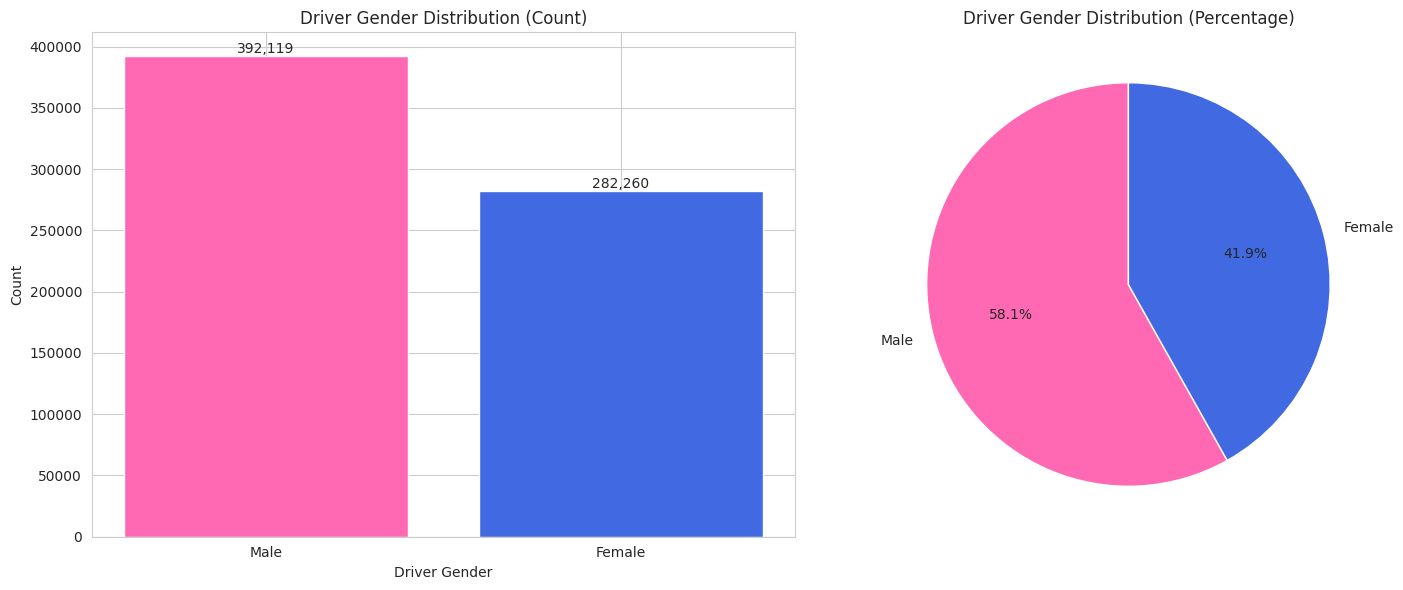


Gender ratio (M:F): 1.39:1


In [7]:
# Driver Gender analysis
print("Driver Gender Distribution:")
print("=" * 80)
gender_counts = df['Driver Gender'].value_counts()
gender_pct = df['Driver Gender'].value_counts(normalize=True) * 100

gender_summary = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_pct
})
print(gender_summary)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
colors_gender = ['#FF69B4', '#4169E1', '#808080']
axes[0].bar(gender_counts.index, gender_counts.values, color=colors_gender[:len(gender_counts)])
axes[0].set_xlabel('Driver Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Driver Gender Distribution (Count)')
for i, v in enumerate(gender_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Pie chart
axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors_gender[:len(gender_counts)])
axes[1].set_title('Driver Gender Distribution (Percentage)')

plt.tight_layout()
plt.show()

print(f"\nGender ratio (M:F): {gender_counts.get('Male', 0) / gender_counts.get('Female', 1):.2f}:1")

### 1.3 Driver Age Distribution

Driver Age Statistics:
count    674379.000000
mean         35.026374
std          12.989342
min          18.000000
25%          25.000000
50%          32.000000
75%          42.000000
max         120.000000
Name: Driver Age, dtype: float64

Age range (filtered 16-100): 18 - 100
Records with valid age: 674,155 (100.0%)


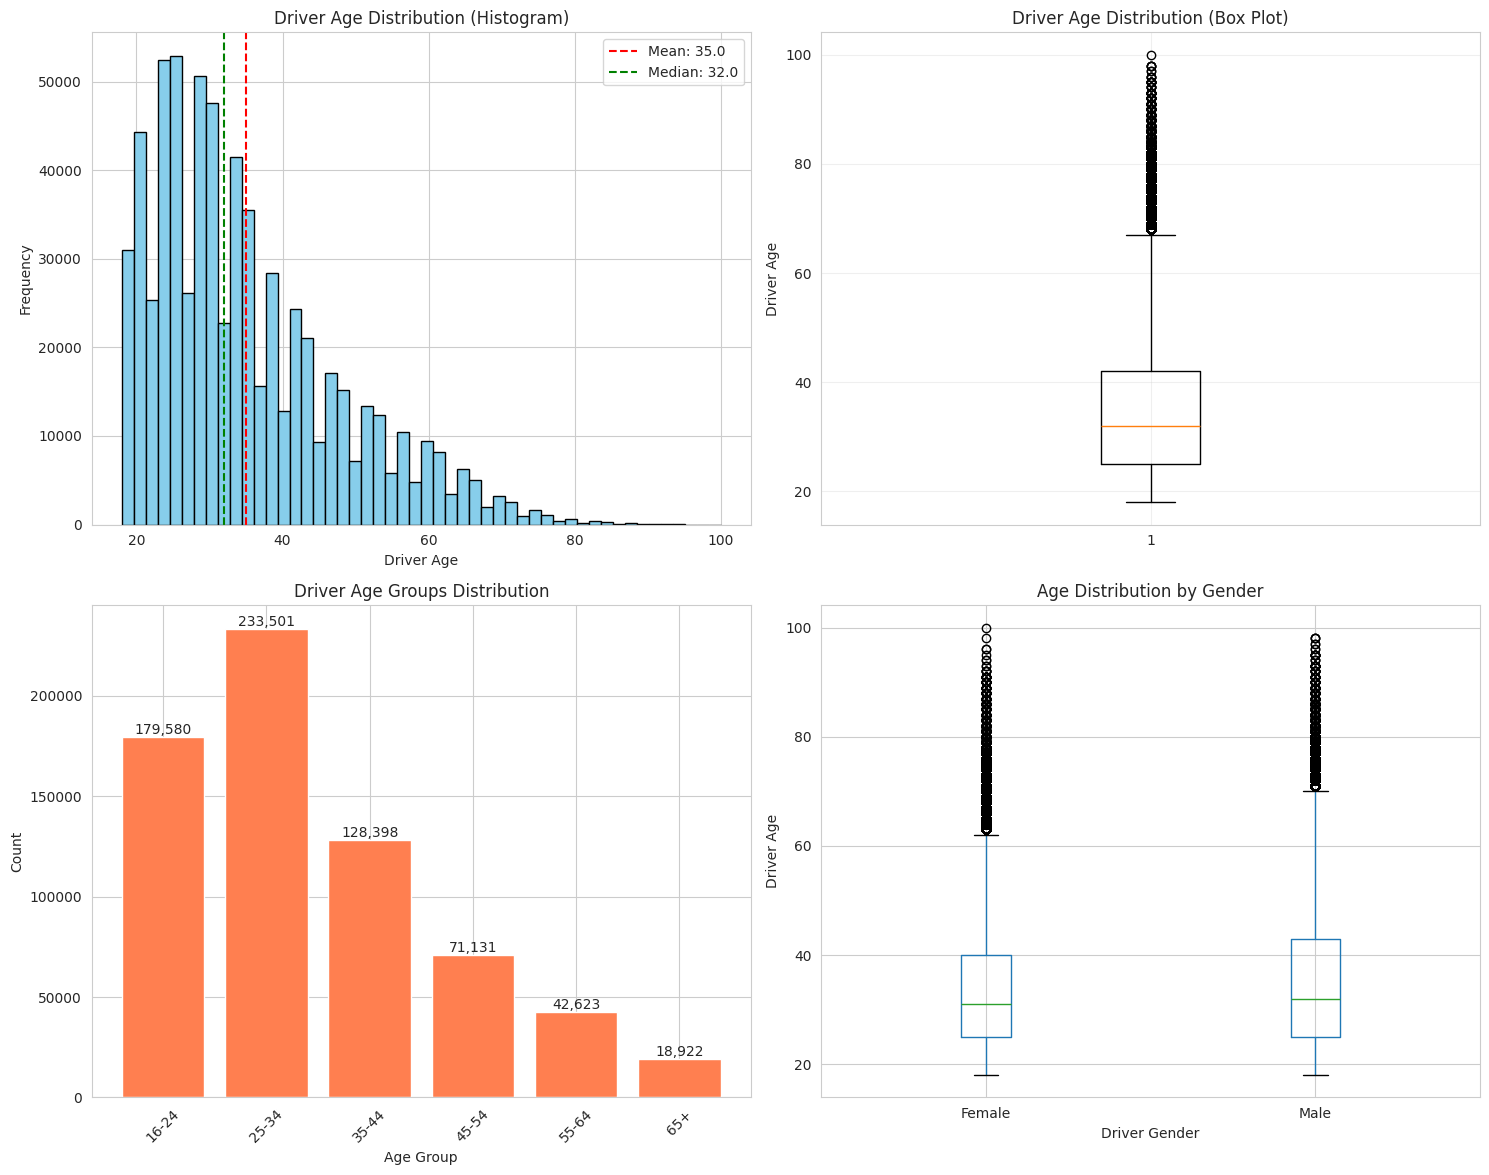


Age Group Distribution:
Age Group
16-24    179580
25-34    233501
35-44    128398
45-54     71131
55-64     42623
65+       18922
Name: count, dtype: int64


In [8]:
# Driver Age analysis
print("Driver Age Statistics:")
print("=" * 80)
print(df['Driver Age'].describe())

# Filter out unrealistic ages for better visualization
age_filtered = df[(df['Driver Age'] >= 16) & (df['Driver Age'] <= 100)]
print(f"\nAge range (filtered 16-100): {age_filtered['Driver Age'].min()} - {age_filtered['Driver Age'].max()}")
print(f"Records with valid age: {len(age_filtered):,} ({len(age_filtered)/len(df)*100:.1f}%)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0, 0].hist(age_filtered['Driver Age'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Driver Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Driver Age Distribution (Histogram)')
axes[0, 0].axvline(age_filtered['Driver Age'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {age_filtered["Driver Age"].mean():.1f}')
axes[0, 0].axvline(age_filtered['Driver Age'].median(), color='green', linestyle='--',
                   label=f'Median: {age_filtered["Driver Age"].median():.1f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(age_filtered['Driver Age'], vert=True)
axes[0, 1].set_ylabel('Driver Age')
axes[0, 1].set_title('Driver Age Distribution (Box Plot)')
axes[0, 1].grid(True, alpha=0.3)

# Age groups
age_bins = [16, 25, 35, 45, 55, 65, 100]
age_labels = ['16-24', '25-34', '35-44', '45-54', '55-64', '65+']
age_filtered['Age Group'] = pd.cut(age_filtered['Driver Age'], bins=age_bins, labels=age_labels)
age_group_counts = age_filtered['Age Group'].value_counts().sort_index()

axes[1, 0].bar(range(len(age_group_counts)), age_group_counts.values, color='coral')
axes[1, 0].set_xticks(range(len(age_group_counts)))
axes[1, 0].set_xticklabels(age_group_counts.index, rotation=45)
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Driver Age Groups Distribution')
for i, v in enumerate(age_group_counts.values):
    axes[1, 0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Age by Gender
age_filtered.boxplot(column='Driver Age', by='Driver Gender', ax=axes[1, 1])
axes[1, 1].set_xlabel('Driver Gender')
axes[1, 1].set_ylabel('Driver Age')
axes[1, 1].set_title('Age Distribution by Gender')
plt.suptitle('')

plt.tight_layout()
plt.show()

print(f"\nAge Group Distribution:")
print(age_group_counts)

### 1.4 Combined Demographics Analysis

Driver Demographics Cross-Tabulation (Race x Gender):
Driver Gender                     Female    Male     All
Driver Race                                             
American Indian/Alaskan Native       266     823    1089
Asian                               1987    4647    6634
Black                             227365  278555  505920
Hispanic                           15730   47784   63514
Native Hawaiian/Pacific Islander      78     322     400
Other                                317    1077    1394
White                              36517   58911   95428
All                               282260  392119  674379


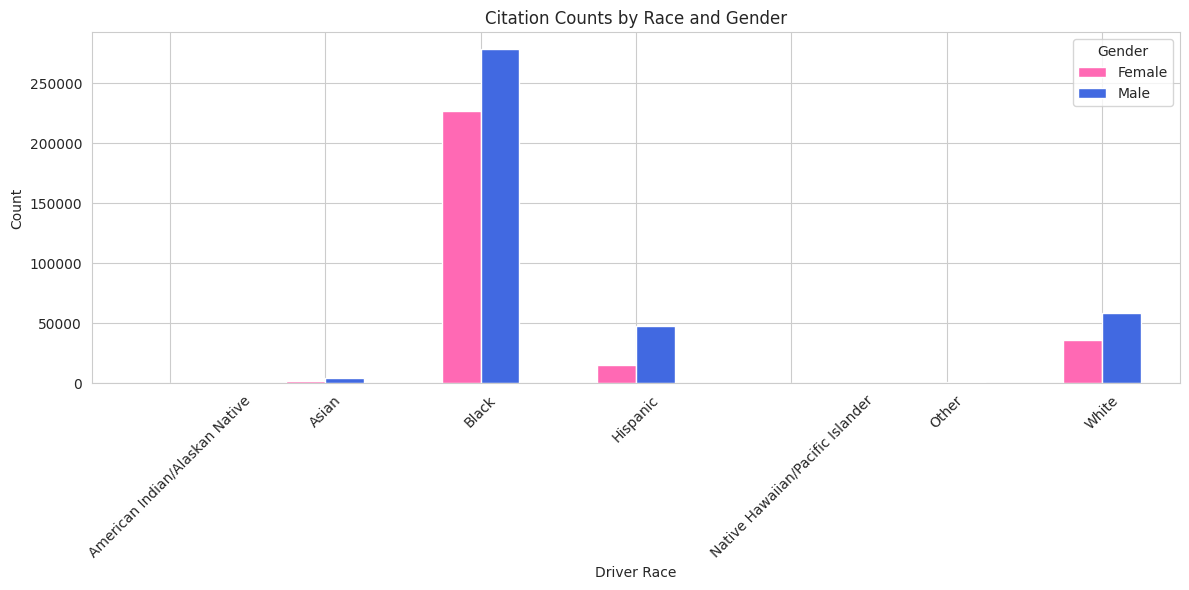

In [9]:
# Race and Gender cross-tabulation
print("Driver Demographics Cross-Tabulation (Race x Gender):")
print("=" * 80)
race_gender_crosstab = pd.crosstab(df['Driver Race'], df['Driver Gender'], margins=True)
print(race_gender_crosstab)

# Visualization
race_gender_df = pd.crosstab(df['Driver Race'], df['Driver Gender'])
race_gender_df.plot(kind='bar', figsize=(12, 6), color=['#FF69B4', '#4169E1'])
plt.title('Citation Counts by Race and Gender')
plt.xlabel('Driver Race')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Vehicle Characteristics Analysis

### 2.1 Vehicle Year Distribution

Vehicle Year Statistics:
count    655272.000000
mean       2011.035199
std           6.439845
min        1927.000000
25%        2007.000000
50%        2011.000000
75%        2016.000000
max        2027.000000
Name: Vehicle Year, dtype: float64

Vehicle year range (filtered 1980-2020): 1980 - 2020


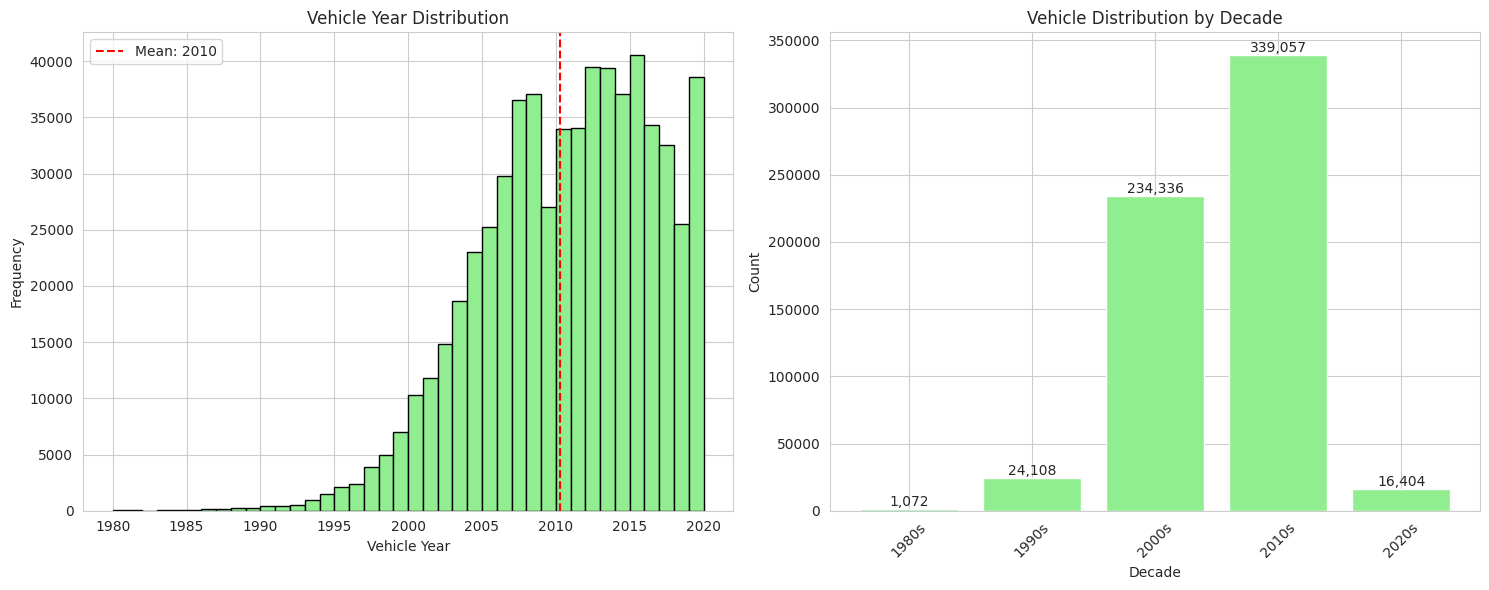

In [10]:
# Vehicle Year analysis
print("Vehicle Year Statistics:")
print("=" * 80)
print(df['Vehicle Year'].describe())

# Filter realistic years (1980-2020)
year_filtered = df[(df['Vehicle Year'] >= 1980) & (df['Vehicle Year'] <= 2020)]
print(f"\nVehicle year range (filtered 1980-2020): {year_filtered['Vehicle Year'].min():.0f} - {year_filtered['Vehicle Year'].max():.0f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axes[0].hist(year_filtered['Vehicle Year'], bins=40, color='lightgreen', edgecolor='black')
axes[0].set_xlabel('Vehicle Year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Vehicle Year Distribution')
axes[0].axvline(year_filtered['Vehicle Year'].mean(), color='red', linestyle='--',
                label=f'Mean: {year_filtered["Vehicle Year"].mean():.0f}')
axes[0].legend()

# Decade grouping
year_filtered['Decade'] = (year_filtered['Vehicle Year'] // 10 * 10).astype(int).astype(str) + 's'
decade_counts = year_filtered['Decade'].value_counts().sort_index()

axes[1].bar(range(len(decade_counts)), decade_counts.values, color='lightgreen')
axes[1].set_xticks(range(len(decade_counts)))
axes[1].set_xticklabels(decade_counts.index, rotation=45)
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Count')
axes[1].set_title('Vehicle Distribution by Decade')
for i, v in enumerate(decade_counts.values):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2.2 Vehicle Make Distribution

Vehicle Make Statistics:
Total unique makes: 889

Top 20 Vehicle Makes:
Vehicle Make
FORD     77216
CHEVR    76222
NISSA    73987
TOYOT    40339
HONDA    35695
DODGE    27022
NISS     26057
CHEV     25351
HYUND    22683
KIA      20792
INFIN    17161
JEEP     16994
TOYT     14539
GENER    12008
CHRYS    11226
HOND     11163
BUICK     9701
LEXUS     8782
DODG      8589
MERCE     8507
Name: count, dtype: int64


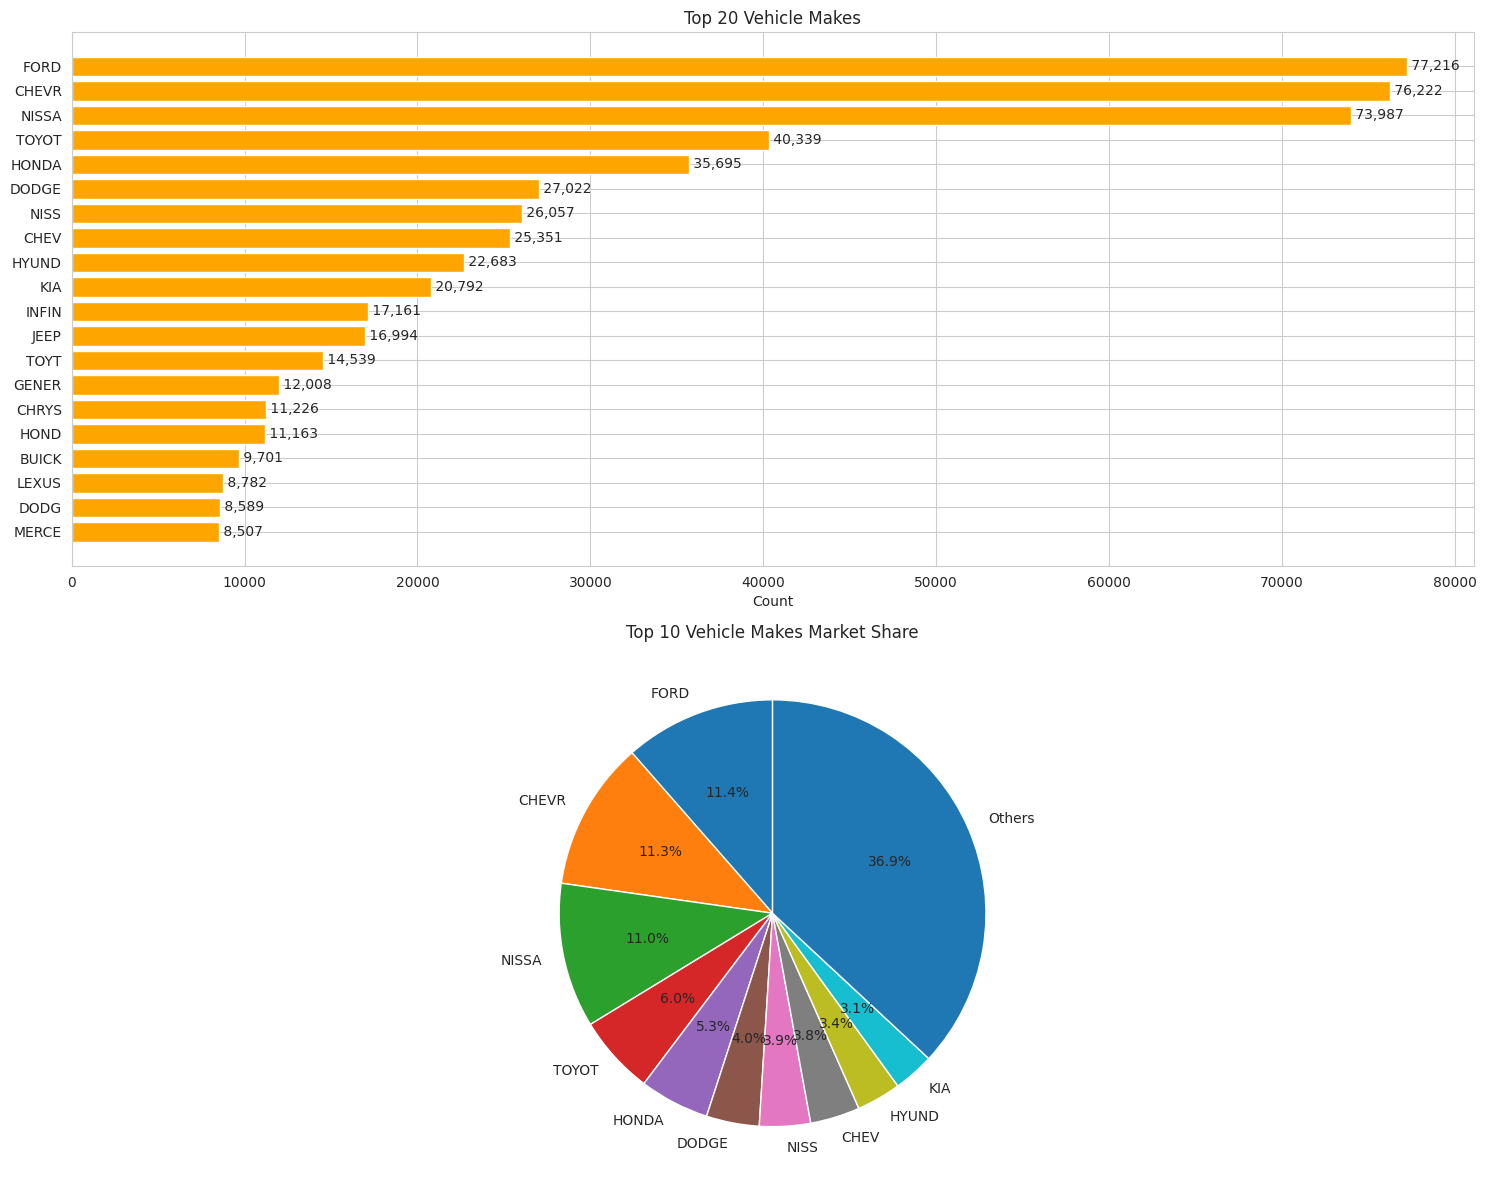


Top 10 makes represent 63.1% of all citations


In [11]:
# Vehicle Make analysis
print("Vehicle Make Statistics:")
print("=" * 80)
make_counts = df['Vehicle Make'].value_counts()
print(f"Total unique makes: {df['Vehicle Make'].nunique()}")
print(f"\nTop 20 Vehicle Makes:")
print(make_counts.head(20))

# Visualization - Top 20
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

top_20_makes = make_counts.head(20)
axes[0].barh(range(len(top_20_makes)), top_20_makes.values, color='orange')
axes[0].set_yticks(range(len(top_20_makes)))
axes[0].set_yticklabels(top_20_makes.index)
axes[0].set_xlabel('Count')
axes[0].set_title('Top 20 Vehicle Makes')
axes[0].invert_yaxis()
for i, v in enumerate(top_20_makes.values):
    axes[0].text(v, i, f' {v:,}', va='center')

# Top 10 market share
top_10_makes = make_counts.head(10)
other_count = make_counts[10:].sum()
pie_data = list(top_10_makes.values) + [other_count]
pie_labels = list(top_10_makes.index) + ['Others']

axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Top 10 Vehicle Makes Market Share')

plt.tight_layout()
plt.show()

# Concentration analysis
top_10_pct = (top_10_makes.sum() / len(df)) * 100
print(f"\nTop 10 makes represent {top_10_pct:.1f}% of all citations")

### 2.3 Vehicle Model Distribution

Vehicle Model Statistics:
Total unique models: 5867

Top 25 Vehicle Models:
Vehicle Model
ALTIM    32855
ACCOR    15141
MALIB    14766
CAMRY    13311
IMPAL    10976
MAXIM    10662
FUSIO    10438
CIVIC     9309
SENTR     8772
ALT       8393
F150      8041
SONAT     7522
CHARG     6889
ELANT     6574
SILVE     6362
COROL     6186
MUSTA     6125
FOCUS     5490
G35       5489
TAHOE     5489
EQUIN     5476
CAM       5414
ROGUE     5239
200       5155
GRAND     4827
Name: count, dtype: int64


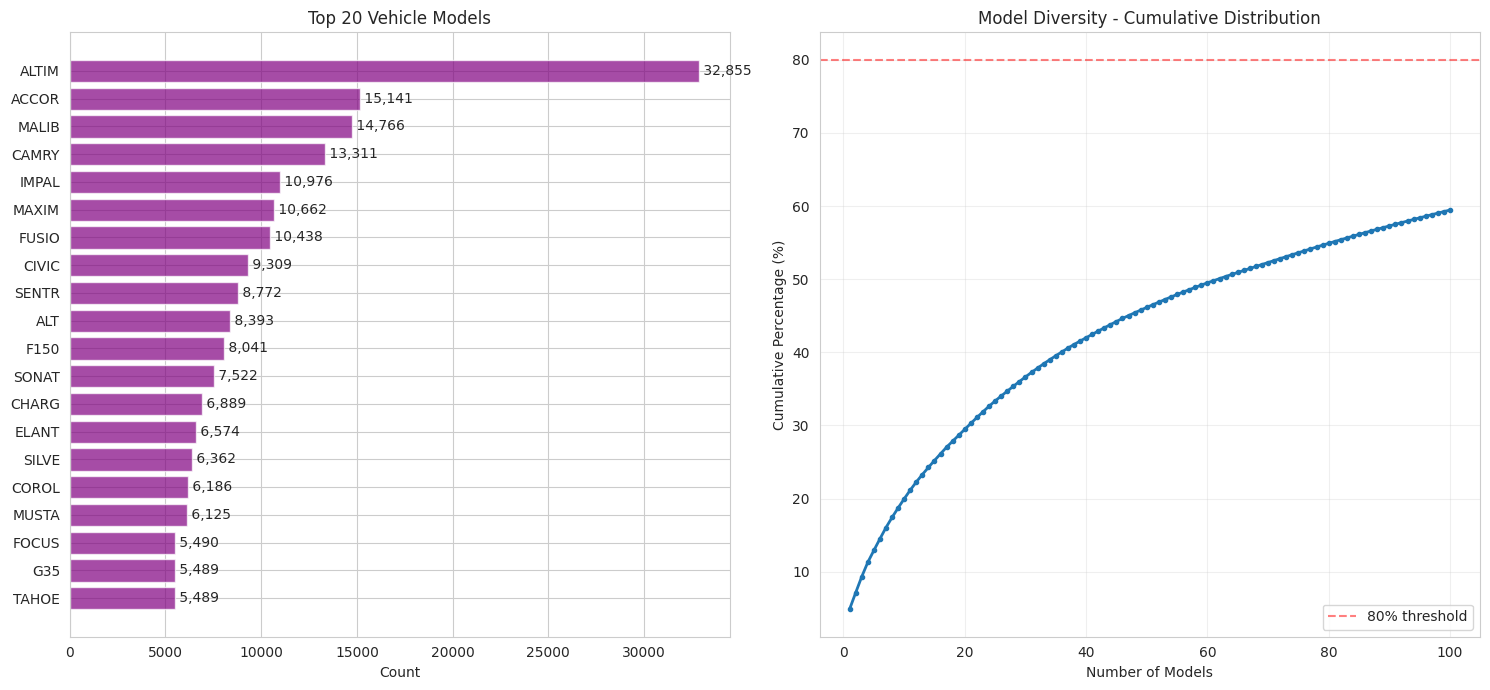


Top 288 models represent 80% of all citations


In [12]:
# Vehicle Model analysis
print("Vehicle Model Statistics:")
print("=" * 80)
model_counts = df['Vehicle Model'].value_counts()
print(f"Total unique models: {df['Vehicle Model'].nunique()}")
print(f"\nTop 25 Vehicle Models:")
print(model_counts.head(25))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

top_20_models = model_counts.head(20)
axes[0].barh(range(len(top_20_models)), top_20_models.values, color='purple', alpha=0.7)
axes[0].set_yticks(range(len(top_20_models)))
axes[0].set_yticklabels(top_20_models.index)
axes[0].set_xlabel('Count')
axes[0].set_title('Top 20 Vehicle Models')
axes[0].invert_yaxis()
for i, v in enumerate(top_20_models.values):
    axes[0].text(v, i, f' {v:,}', va='center')

# Model diversity
model_cumsum = (model_counts.cumsum() / model_counts.sum() * 100)
axes[1].plot(range(1, min(101, len(model_cumsum)+1)), model_cumsum.head(100).values, 
             marker='o', markersize=3, linewidth=2)
axes[1].set_xlabel('Number of Models')
axes[1].set_ylabel('Cumulative Percentage (%)')
axes[1].set_title('Model Diversity - Cumulative Distribution')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=80, color='r', linestyle='--', alpha=0.5, label='80% threshold')
axes[1].legend()

plt.tight_layout()
plt.show()

# Find how many models represent 80% of data
models_for_80pct = (model_cumsum >= 80).argmax() + 1
print(f"\nTop {models_for_80pct} models represent 80% of all citations")

## 3. Citation Analysis

### 3.1 Citation Type Distribution

Citation Type Distribution:
                Count  Percentage
Citation Type                    
NON-MOVING     397364   59.132164
MOVING         274629   40.867836


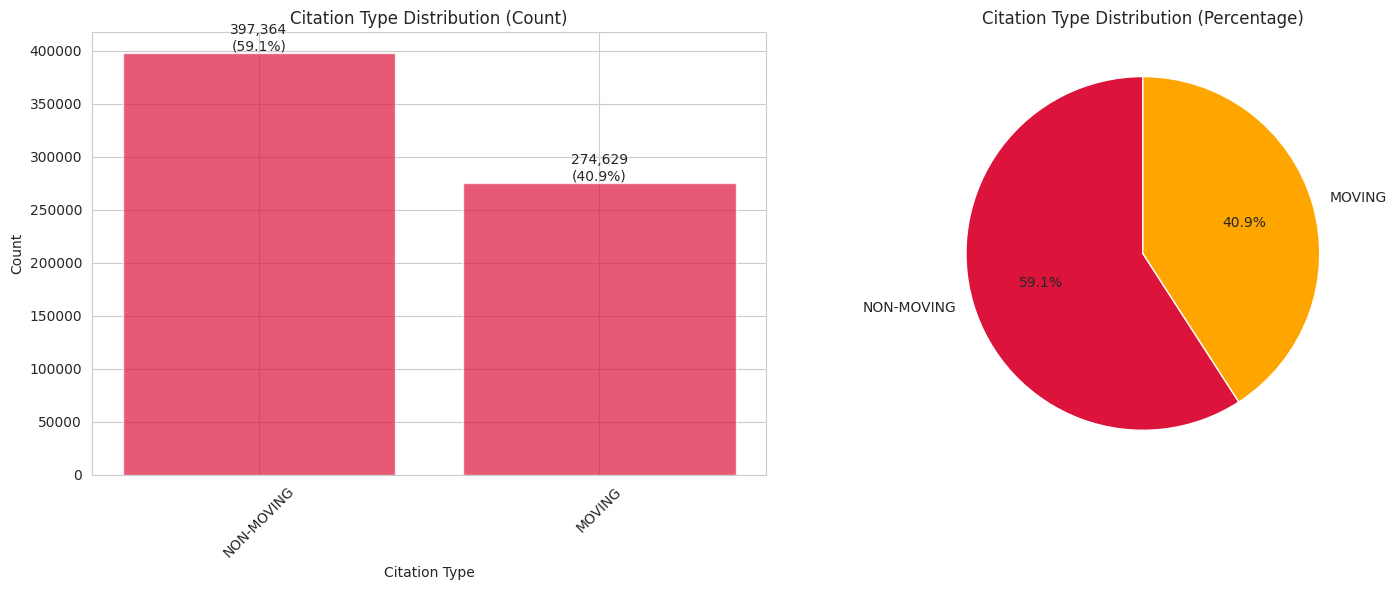


Total citation types: 2


In [13]:
# Citation Type analysis
print("Citation Type Distribution:")
print("=" * 80)
citation_counts = df['Citation Type'].value_counts()
citation_pct = df['Citation Type'].value_counts(normalize=True) * 100

citation_summary = pd.DataFrame({
    'Count': citation_counts,
    'Percentage': citation_pct
})
print(citation_summary)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
axes[0].bar(citation_counts.index, citation_counts.values, color='crimson', alpha=0.7)
axes[0].set_xlabel('Citation Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Citation Type Distribution (Count)')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(citation_counts.values):
    axes[0].text(i, v, f'{v:,}\n({citation_pct.iloc[i]:.1f}%)', ha='center', va='bottom')

# Pie chart
axes[1].pie(citation_counts.values, labels=citation_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['crimson', 'orange', 'gold'])
axes[1].set_title('Citation Type Distribution (Percentage)')

plt.tight_layout()
plt.show()

print(f"\nTotal citation types: {df['Citation Type'].nunique()}")

### 3.2 Ordinance Violated Distribution

Ordinance Violated Statistics:
Total unique ordinances: 248

Top 30 Ordinances Violated:
Ordinance Violated
SPEED LIMIT             145452
NO DRIVERS LICENSE      117003
STATE REGISTRATION      108486
FINANCIAL RESP           91733
MAINT. SAFE LOOKOUT      25245
DISREGARD RED LIGHT      17431
DISREGARD STOP SIGN      17166
IMPROPER DISPLAY-TAG     12456
MAIN PROPER CONTROL      11866
IMPROPER STATE REGIS     10814
SEAT BELT REQ.            9473
HEADLIGHTS/VEHICLES       9050
TAIL LIGHTS REQUIRED      8685
FINANCIAL RESPONSIBI      7944
FOLLOW TO CLOSELY         6808
STRIKE PARKED VEH         6206
CHANGE/STRADDLE LANE      4734
TINTED WINDOWS            4082
SPEED-SCHOOL ZONE         3840
YIELD INTERSECTION        2821
FULL TIME/ATTENTION       2445
IMPROPER LEFT TURN        2312
HEADLAMP OPERATIONAL      2170
LIGHTS REQUIRED           2099
IMPROPER U-TURN           1952
CHILD SAFETY SEAT         1830
MAINTAIN SAFE LOOKOU      1741
DISREGARDED RED LIGH      1678
MAINTAIN SAFE SPEED     

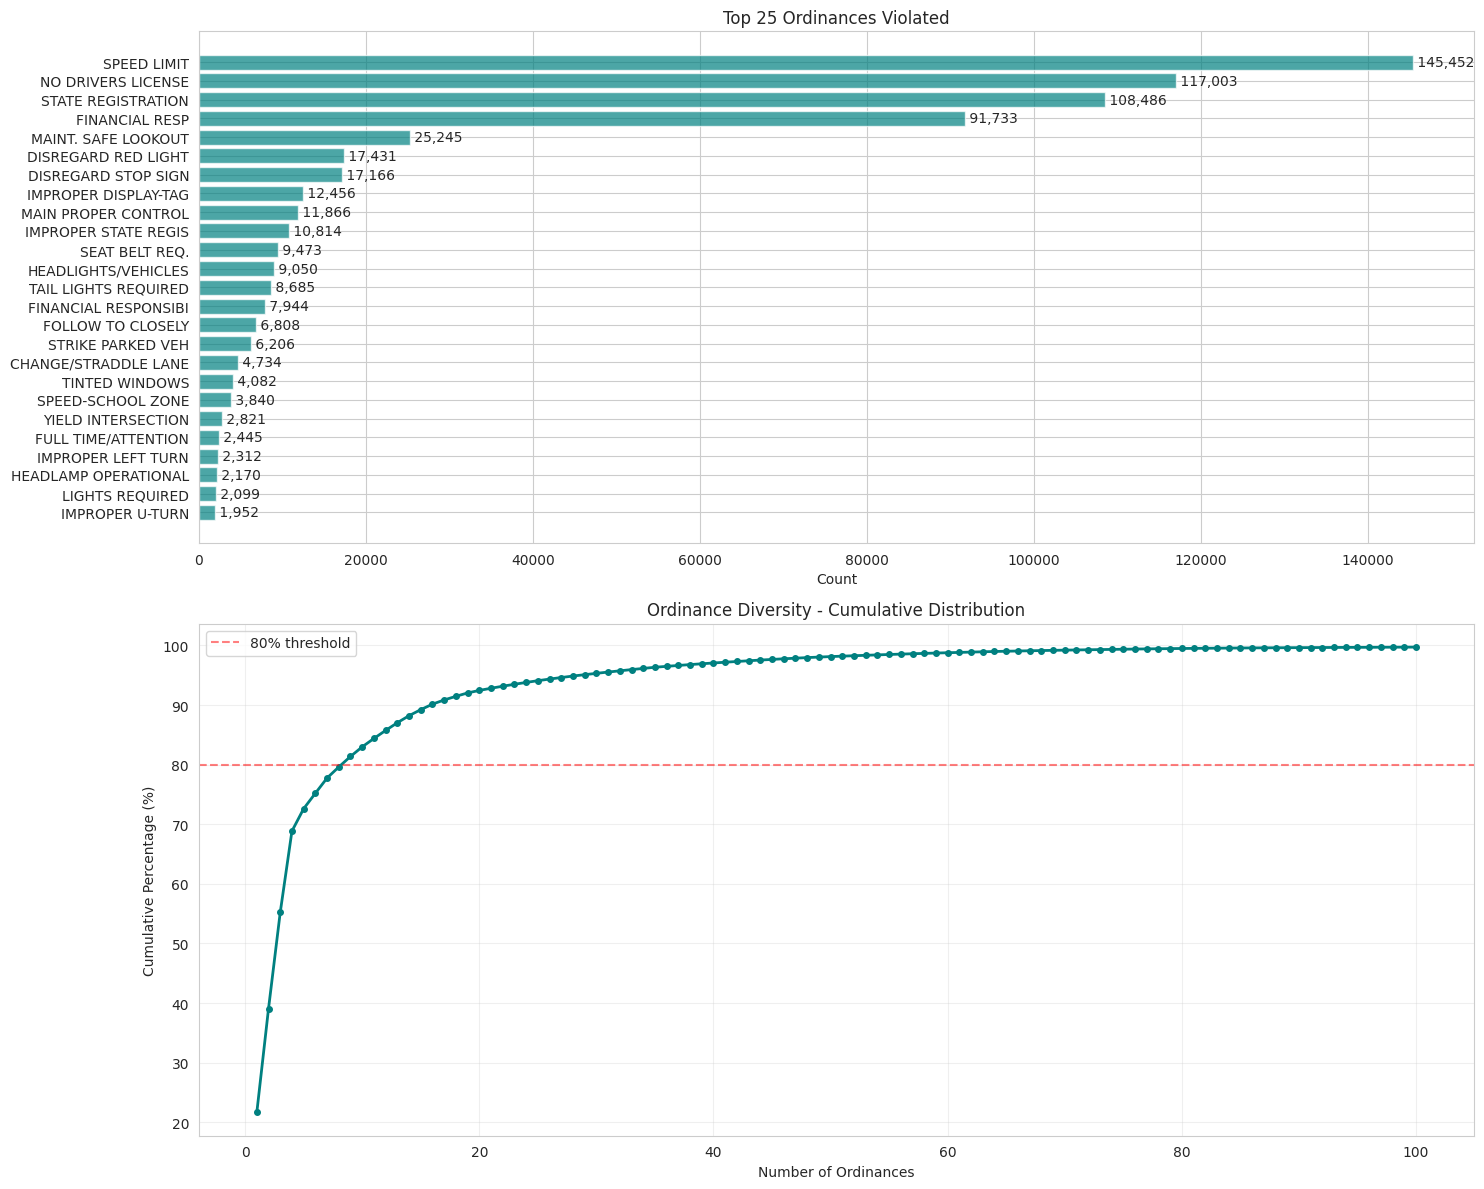


Top 9 ordinances represent 80% of all citations
Top 10 ordinances represent 82.7% of all citations


In [14]:
# Ordinance Violated analysis
print("Ordinance Violated Statistics:")
print("=" * 80)
ordinance_counts = df['Ordinance Violated'].value_counts()
print(f"Total unique ordinances: {df['Ordinance Violated'].nunique()}")
print(f"\nTop 30 Ordinances Violated:")
print(ordinance_counts.head(30))

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Top 25 ordinances
top_25_ordinances = ordinance_counts.head(25)
axes[0].barh(range(len(top_25_ordinances)), top_25_ordinances.values, color='teal', alpha=0.7)
axes[0].set_yticks(range(len(top_25_ordinances)))
axes[0].set_yticklabels(top_25_ordinances.index)
axes[0].set_xlabel('Count')
axes[0].set_title('Top 25 Ordinances Violated')
axes[0].invert_yaxis()
for i, v in enumerate(top_25_ordinances.values):
    axes[0].text(v, i, f' {v:,}', va='center')

# Ordinance concentration
ordinance_cumsum = (ordinance_counts.cumsum() / ordinance_counts.sum() * 100)
axes[1].plot(range(1, min(101, len(ordinance_cumsum)+1)), ordinance_cumsum.head(100).values,
             marker='o', markersize=4, linewidth=2, color='teal')
axes[1].set_xlabel('Number of Ordinances')
axes[1].set_ylabel('Cumulative Percentage (%)')
axes[1].set_title('Ordinance Diversity - Cumulative Distribution')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=80, color='r', linestyle='--', alpha=0.5, label='80% threshold')
axes[1].legend()

plt.tight_layout()
plt.show()

# Concentration metrics
ordinances_for_80pct = (ordinance_cumsum >= 80).argmax() + 1
top_10_ordinance_pct = (ordinance_counts.head(10).sum() / len(df)) * 100
print(f"\nTop {ordinances_for_80pct} ordinances represent 80% of all citations")
print(f"Top 10 ordinances represent {top_10_ordinance_pct:.1f}% of all citations")

### 3.3 Citation Type vs Ordinance Cross-Analysis

Citation Type vs Top 10 Ordinances:
Ordinance Violated  DISREGARD RED LIGHT  DISREGARD STOP SIGN  FINANCIAL RESP  \
Citation Type                                                                  
MOVING                            17431                17166               0   
NON-MOVING                            0                    0           91733   

Ordinance Violated  IMPROPER DISPLAY-TAG  IMPROPER STATE REGIS  \
Citation Type                                                    
MOVING                                 0                     0   
NON-MOVING                         12456                 10814   

Ordinance Violated  MAIN PROPER CONTROL  MAINT. SAFE LOOKOUT  \
Citation Type                                                  
MOVING                            11866                25245   
NON-MOVING                            0                    0   

Ordinance Violated  NO DRIVERS LICENSE  SPEED LIMIT  STATE REGISTRATION  
Citation Type                                  

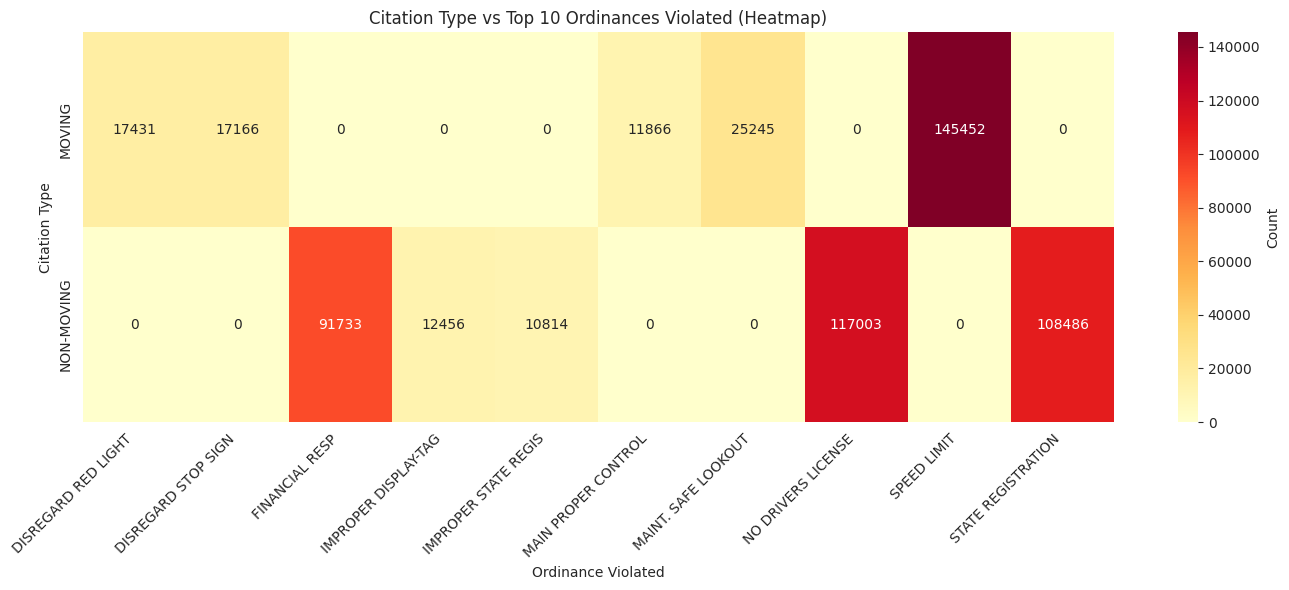

In [15]:
# Cross-tabulation of Citation Type and top Ordinances
print("Citation Type vs Top 10 Ordinances:")
print("=" * 80)

top_10_ordinances = ordinance_counts.head(10).index
df_top_ordinances = df[df['Ordinance Violated'].isin(top_10_ordinances)]

citation_ordinance_crosstab = pd.crosstab(
    df_top_ordinances['Citation Type'],
    df_top_ordinances['Ordinance Violated']
)
print(citation_ordinance_crosstab)

# Heatmap visualization
plt.figure(figsize=(14, 6))
sns.heatmap(citation_ordinance_crosstab, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Count'})
plt.title('Citation Type vs Top 10 Ordinances Violated (Heatmap)')
plt.xlabel('Ordinance Violated')
plt.ylabel('Citation Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Data Quality Assessment for ML

### 4.1 Class Balance Analysis

In [16]:
# Assess potential target variables for classification
print("CLASS BALANCE ASSESSMENT")
print("=" * 80)

# Function to calculate balance metrics
def assess_balance(series, name):
    counts = series.value_counts()
    percentages = series.value_counts(normalize=True) * 100
    
    print(f"\n{name}:")
    print("-" * 40)
    print(f"Unique classes: {len(counts)}")
    print(f"Majority class: {counts.index[0]} ({percentages.iloc[0]:.2f}%)")
    print(f"Minority class: {counts.index[-1]} ({percentages.iloc[-1]:.2f}%)")
    
    # Imbalance ratio
    if len(counts) > 1:
        imbalance_ratio = counts.iloc[0] / counts.iloc[-1]
        print(f"Imbalance ratio (majority/minority): {imbalance_ratio:.2f}:1")
        
        # Balance assessment
        if imbalance_ratio < 1.5:
            status = "✓ WELL BALANCED"
        elif imbalance_ratio < 3:
            status = "⚠ SLIGHTLY IMBALANCED"
        elif imbalance_ratio < 10:
            status = "⚠ MODERATELY IMBALANCED"
        else:
            status = "✗ HIGHLY IMBALANCED"
        print(f"Balance status: {status}")
    
    return counts, percentages

# Assess key categorical variables
citation_counts, citation_pct = assess_balance(df['Citation Type'], 'Citation Type')
race_counts, race_pct = assess_balance(df['Driver Race'], 'Driver Race')
gender_counts, gender_pct = assess_balance(df['Driver Gender'], 'Driver Gender')

# Top 10 ordinances only
df_top_ord = df[df['Ordinance Violated'].isin(ordinance_counts.head(10).index)]
ordinance_counts_top, ordinance_pct_top = assess_balance(
    df_top_ord['Ordinance Violated'], 
    'Ordinance Violated (Top 10 only)'
)

CLASS BALANCE ASSESSMENT

Citation Type:
----------------------------------------
Unique classes: 2
Majority class: NON-MOVING (59.13%)
Minority class: MOVING (40.87%)
Imbalance ratio (majority/minority): 1.45:1
Balance status: ✓ WELL BALANCED

Driver Race:
----------------------------------------
Unique classes: 7
Majority class: Black (75.02%)
Minority class: Native Hawaiian/Pacific Islander (0.06%)
Imbalance ratio (majority/minority): 1264.80:1
Balance status: ✗ HIGHLY IMBALANCED

Driver Gender:
----------------------------------------
Unique classes: 2
Majority class: Male (58.15%)
Minority class: Female (41.85%)
Imbalance ratio (majority/minority): 1.39:1
Balance status: ✓ WELL BALANCED

Ordinance Violated (Top 10 only):
----------------------------------------
Unique classes: 10
Majority class: SPEED LIMIT (26.08%)
Minority class: IMPROPER STATE REGIS (1.94%)
Imbalance ratio (majority/minority): 13.45:1
Balance status: ✗ HIGHLY IMBALANCED


### 4.2 Feature Cardinality Assessment

FEATURE CARDINALITY ASSESSMENT
           Feature  Unique Values Cardinality Ratio                       Category
     Citation Type              2            0.0000              Low (Good for ML)
Ordinance Violated            248            0.0004          High (Needs encoding)
      Vehicle Make            889            0.0013 Very High (May need reduction)
     Vehicle Model           5867            0.0087 Very High (May need reduction)
       Driver Race              7            0.0000              Low (Good for ML)
     Driver Gender              2            0.0000              Low (Good for ML)
      Officer Name           4080            0.0061 Very High (May need reduction)
          Location          66286            0.0983 Very High (May need reduction)


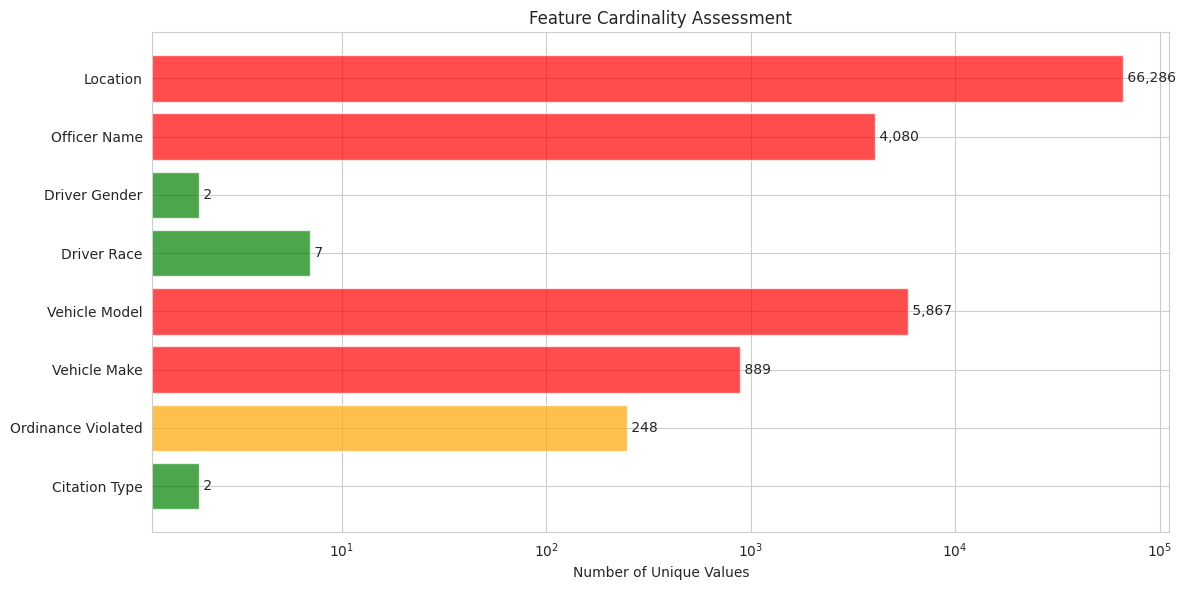

In [17]:
# Assess cardinality for ML features
print("FEATURE CARDINALITY ASSESSMENT")
print("=" * 80)

categorical_features = [
    'Citation Type', 'Ordinance Violated', 'Vehicle Make', 'Vehicle Model',
    'Driver Race', 'Driver Gender', 'Officer Name', 'Location'
]

cardinality_data = []
for feature in categorical_features:
    unique_count = df[feature].nunique()
    total_count = len(df)
    cardinality_ratio = unique_count / total_count
    
    # Categorize cardinality
    if unique_count < 10:
        category = "Low (Good for ML)"
    elif unique_count < 50:
        category = "Medium (Manageable)"
    elif unique_count < 500:
        category = "High (Needs encoding)"
    else:
        category = "Very High (May need reduction)"
    
    cardinality_data.append({
        'Feature': feature,
        'Unique Values': unique_count,
        'Cardinality Ratio': f"{cardinality_ratio:.4f}",
        'Category': category
    })

cardinality_df = pd.DataFrame(cardinality_data)
print(cardinality_df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
colors_card = ['green' if 'Good' in cat else 'yellow' if 'Manageable' in cat 
               else 'orange' if 'encoding' in cat else 'red' 
               for cat in cardinality_df['Category']]
ax.barh(cardinality_df['Feature'], cardinality_df['Unique Values'], color=colors_card, alpha=0.7)
ax.set_xlabel('Number of Unique Values')
ax.set_title('Feature Cardinality Assessment')
ax.set_xscale('log')
for i, v in enumerate(cardinality_df['Unique Values']):
    ax.text(v, i, f' {v:,}', va='center')
plt.tight_layout()
plt.show()

## 5. Summary and ML Readiness Assessment

In [18]:
print("="*80)
print("MACHINE LEARNING READINESS ASSESSMENT SUMMARY")
print("="*80)

print("\n1. DATASET SIZE AND COMPLETENESS:")
print("-" * 40)
print(f"   Total records: {len(df):,}")
print(f"   ✓ EXCELLENT - Large dataset suitable for ML")
missing_pct_total = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
print(f"   Missing data: {missing_pct_total:.2f}% overall")
if missing_pct_total < 5:
    print(f"   ✓ EXCELLENT - Very little missing data")
elif missing_pct_total < 15:
    print(f"   ⚠ ACCEPTABLE - Some missing data, may need imputation")
else:
    print(f"   ✗ CONCERN - Significant missing data")

print("\n2. TARGET VARIABLE OPTIONS:")
print("-" * 40)
print(f"   Citation Type: {df['Citation Type'].nunique()} classes")
cit_ratio = df['Citation Type'].value_counts().iloc[0] / df['Citation Type'].value_counts().iloc[-1]
if cit_ratio < 3:
    print(f"   ✓ GOOD BALANCE (ratio: {cit_ratio:.1f}:1)")
else:
    print(f"   ⚠ IMBALANCED (ratio: {cit_ratio:.1f}:1)")

print(f"\n   Top 10 Ordinances: 10 classes (filtered from {df['Ordinance Violated'].nunique()})")
print(f"   ⚠ Consider grouping similar ordinances or top-N classification")

print("\n3. FEATURE QUALITY:")
print("-" * 40)
print(f"   Driver Race: {df['Driver Race'].nunique()} classes - ✓ Good for ML")
print(f"   Driver Gender: {df['Driver Gender'].nunique()} classes - ✓ Good for ML")
print(f"   Driver Age: Continuous variable - ✓ Good for ML")
print(f"   Vehicle Year: Continuous variable - ✓ Good for ML")
print(f"   Vehicle Make: {df['Vehicle Make'].nunique()} classes - ⚠ High cardinality, consider top-N")
print(f"   Vehicle Model: {df['Vehicle Model'].nunique()} classes - ⚠ Very high, may need grouping")

print("\n4. DATA DISTRIBUTION CONCERNS:")
print("-" * 40)

# Check race imbalance
race_top_pct = (df['Driver Race'].value_counts().iloc[0] / len(df)) * 100
if race_top_pct > 60:
    print(f"   ⚠ Driver Race: {df['Driver Race'].value_counts().index[0]} is {race_top_pct:.1f}% of data")
    print(f"      Consider stratified sampling or class weighting")

# Check gender imbalance  
gender_top_pct = (df['Driver Gender'].value_counts().iloc[0] / len(df)) * 100
if abs(gender_top_pct - 50) > 15:
    print(f"   ⚠ Driver Gender: {df['Driver Gender'].value_counts().index[0]} is {gender_top_pct:.1f}% of data")

# Check citation type imbalance
citation_top_pct = (df['Citation Type'].value_counts().iloc[0] / len(df)) * 100
if citation_top_pct > 70:
    print(f"   ⚠ Citation Type: {df['Citation Type'].value_counts().index[0]} is {citation_top_pct:.1f}% of data")
    print(f"      Minority classes may be underrepresented")

print("\n5. RECOMMENDATIONS FOR ML:")
print("-" * 40)
print("   ✓ Dataset is suitable for classification tasks")
print("   ✓ Large sample size supports train/validation/test splits")
print("   ⚠ Consider these preprocessing steps:")
print("      - Group low-frequency categories in high-cardinality features")
print("      - Use stratified sampling for train/test split")
print("      - Apply class weights for imbalanced classes")
print("      - One-hot encode or target encode categorical variables")
print("      - Normalize/standardize numerical features (Age, Year)")
print("      - Consider feature engineering (vehicle age, age groups, etc.)")

print("\n6. SUGGESTED CLASSIFICATION TASKS:")
print("-" * 40)
print("   1. Predict Citation Type (MOVING vs NON-MOVING)")
print("      - Binary classification, moderate balance")
print("   2. Predict Top-N Ordinances Violated")
print("      - Multi-class, focus on most common violations")
print("   3. Predict Driver Demographics (for bias analysis)")
print("      - Useful for fairness/equity studies")

print("\n" + "="*80)

MACHINE LEARNING READINESS ASSESSMENT SUMMARY

1. DATASET SIZE AND COMPLETENESS:
----------------------------------------
   Total records: 674,379
   ✓ EXCELLENT - Large dataset suitable for ML
   Missing data: 0.37% overall
   ✓ EXCELLENT - Very little missing data

2. TARGET VARIABLE OPTIONS:
----------------------------------------
   Citation Type: 2 classes
   ✓ GOOD BALANCE (ratio: 1.4:1)

   Top 10 Ordinances: 10 classes (filtered from 248)
   ⚠ Consider grouping similar ordinances or top-N classification

3. FEATURE QUALITY:
----------------------------------------
   Driver Race: 7 classes - ✓ Good for ML
   Driver Gender: 2 classes - ✓ Good for ML
   Driver Age: Continuous variable - ✓ Good for ML
   Vehicle Year: Continuous variable - ✓ Good for ML
   Vehicle Make: 889 classes - ⚠ High cardinality, consider top-N
   Vehicle Model: 5867 classes - ⚠ Very high, may need grouping

4. DATA DISTRIBUTION CONCERNS:
----------------------------------------
   ⚠ Driver Race: Black is